# Regression

Regression models (both linear and non-linear) are used for predicting a real value

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Simple Linear Regression

$y = b + \theta_1  x_1$<br>
where - y: Dependent Variable (DV); x: Independent Variable (IV); $\theta$: Coefficient; $b$: Constant
<br><br>Linear Regression uses the ordinary least squares method 
$sum(y-\hat{y})^2$
to find the best fitting line

### Data Preprocess

In [2]:
# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
X = dataset.iloc[:, :-1].values    # it's matrix now rather than array
y = dataset.iloc[:, -1].values  

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

因为这次是 Simple Linear Regression, 只有一个 x, 不存在 independent variables 之间互相影响。
<br>Python library 会 take care scaling，所以这次不需要自己手动 scaling

In [5]:
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

### Fitting Simple Linear Regression to the Training Set

Linear Regression model 通过输入的 X_train 和 y_train，自动找出两者的关系方程，并建立模型

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the Test Set Results

In [7]:
y_pred = regressor.predict(X_test)
regressor.score(X_test,y_test)

0.9749154407708353

### Visualization

Plot Regression Model Line <br>
无论用 train 还是 test,画出的 model line 应该是一样的。<br>
因为通过 train 或者 test 所建立的 model： regressor 是一样的。

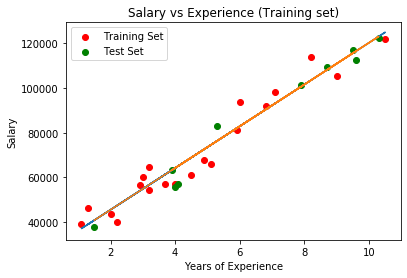

In [8]:
# Visualising the Training and Test sets results
train = plt.scatter(X_train,y_train,color='red')
test = plt.scatter(X_test,y_test,color='green')

plt.plot(X_train,regressor.predict(X_train))
plt.plot(X_test,regressor.predict(X_test))   

plt.legend((train,test),('Training Set','Test Set'))
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Multiple Linear Regression

$y = b_0 + b_1  x_1 + b_2 x_2 + ... + b_n x_n$

### Dummy Variable

**When we face categorical variables in regression models, we need to create dummy variables**
* Go through the categorical column and find all the different categories (ie. New York, California, Florida...)
* For every single category, we need to create a new column

Dummy variables will work like a switch. In the case:<br>
$y = b_0 + b_1  x_1 + b_2 x_2 + ... + b_n D_n$<br>
where Dn is the dummy variable, the coefficient bn of the dummy variable will affect the constant $b_0$ when it's on (1)

### Dummy Variable Trap

**<font color='blue'>如果有 N 个categories, 则只应该引入 N-1 个 dummy variables。否则会导致多重共线性（使模型估计失真或难以估计准确）</font>**<br>
**<font color='green'> Always omit ONE dummy variable</font>**

### P-Value

**P值用来检验 Hypotheses Test 假设是否成立。p值如果比 Significance level (5%) 更小，则 Hypotheses 不成立**

### Building A Model (Step-By-Step)

5 methods of building models:
1. All-in
2. <font color='blue'>Backward Elimination</font>
3. Forward Selection
4. Bidirection Elimination
5. Score Comparison

where step 2,3,4 may be called as "Stepwise Regression"

#### All-in

Throw in all the variables

#### <font color='blue'>Backward Elimination</font> (Fastest Method)

**STEP 1:** Select a significance level to stay in the model (e.g. SL = 5%)<br>
**STEP 2:** Fit the full model with all variables, then we start to get rid of them<br>
**STEP 3:** Find the variable with the highest P-value. If P > SL, go to STEP 4, otherwise, go to **FIN (Your Model is Ready)**<br>
**STEP 4:** Remove the variable that has the highest P-value<br>
**STEP 5:** Re-Fit model without that variable (with the highest P-value)<br>

Then go back to STEP 3, once again we look for the variable with the highest P-value in the new model. Then take it out and remove it. Then fit the model again without that variable...

Keep doing these STEPs **until all the P-values are LESS than SL**

#### Forward Selection

**STEP 1:** Select a significance level to enter the model (e.g. SL = 5%)<br>
**STEP 2:** Create a regression model with **each single** independent variable and dependent variable. Select the one with the lowest P-value<br>
**STEP 3:** Keep this variable and then add all other variables one by one, then we will construct all new 2 variables regression models, but one of these variables is the we selected (with the lowest P-value)<br>
**STEP 4:** Then we consider the one where the new variable we added had the lowest P-value. If P < SL, go to STEP 3, otherwise go to FIN<br>
**Notice:** You need select the previous one model, because you've just added a variable which is insignificant on the last STEP<br>

#### Bidirectional Elimination

**STEP 1:** Select a significance level to enter and stay in the model (e.g: SLENTER = 5%, SLSTAY = 5%)<br>
**STEP 2:** Perform the next step of Forward Selection (new variables must have P < SLENTER to enter)<br>
**STEP 3:** Perform ALL steps of Backward Elimination (old variables must have P < SLSTAY to stay)<br>
**STEP 4:** Go back to STEP 2 until at some point no new variable can enter or no old variable can delete

#### Score Comparison (All Possible Models)

**STEP 1:** Select a criterion of goodness of fit (e.g. Akaike criterion)<br>
**STEP 2:** Contruct All Possible Regression Models: $2^N-1$ total combinations (ex: 10 columns means 1023 models)<br>
**STEP 3:** Select the one with the best criterion

### Data Preprocess

In [9]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
X = dataset.iloc[:,:-1].values # R&D, Admin, Marketing, State
y = dataset.iloc[:,-1].values # Profit

**Must encode the categorical variable, and Must be done before we split Train/Test**

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:,-1] = labelencoder_X.fit_transform(X[:,-1])
onehotencoder = OneHotEncoder(categorical_features = [-1])
X = onehotencoder.fit_transform(X).toarray()

C:\Users\XZV838\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\XZV838\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


**Avoiding the Dummy Variable Trap :**
<br>Python Library for linear regression is taking care of the dummy variable trap (we don't need do it manually)
<br>For some software, we need take one variable away manually: X = X[:,1:]

In [12]:
X = X[:,1:]

**We don't need to apply feature scaling for the multiple linear regression, because Python library will take care of that for us**

Splitting the dataset into the Training and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Fitting Multiple Linear Regression to the Training Set

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the Test Set results

In [15]:
y_pred = regressor.predict(X_test)

### Backward Elimination Implementation

#### Prepare

In [16]:
import statsmodels.api as sm

$y = b_0 + b_1  x_1 + b_2 x_2 + ... + b_n x_n$<br>
可以看作$b_0 x0$  where  $x_0$ = 1<br>
所以 X 可以新加一列 “1” 作为 $x_0$

This is required by the statsmodels library that we will use later to get statistical information of our independent variables

numpy.append(arr, values, axis=None):<br>
简答来说，就是arr和values会重新组合成一个新的数组，做为返回值。而axis是一个可选的值<br>
当axis无定义时(默认为0)，是横向加成，返回总是为一维数组！<br>
当axis为0时，数组是加在下面（列数要相同）。<br>
当axis为1时，数组是加在左边（行数要相同）。

In [17]:
X = np.append(arr=np.ones((X.shape[0],1)).astype(int),values=X,axis=1)

To create the optimal matrix of features which contains the optimal team of independent variables that are only statistically significant for dependent variable

In [18]:
X_opt = X[:,:]    # copy X
X_opt.shape

(50, 6)

#### STEP 1: Select a significance level to stay in the model (e.g. SL = 5%)

#### STEP 2: Fit the full model with all variables, then we start to get rid of them

Create a new regress object called OLS (ordinary least squares)<br>
endog: The dependent variable<br>
exog: "An intercept is not included by default and should be added by the user", that's why we added column "1" in the original X

In [19]:
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()    #.fit() will do the job to fit ordinary least square

#### STEP 3: Find the variable with the highest P-value. If P > SL, go to STEP 4, otherwise, go to FIN (Your Model is Ready)

statsmodels will provide the *_summary_* function which will return a great table containing all the statistical metrics<br>
We will get each independent variable its P-value and compare it to the SL to decide if we need to remove it

In [20]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           1.34e-27
Time:                        12:26:12   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The lower P-value of the independent varaible is more significantly impact the dependent varaible
<br>
* const: the constant "1" we just added for $b_0$ coef<br>
* $x_1, x_2$: two dummy variables<br>
* $x_3$: R&D spend<br>
* $x_4$: admin<br>
* $x_5$: marketing spend<br>

#### STEP 4: Remove the variable that has the highest P-value

From the summary table, we can see the highest P-value is x2 (dummy variable). So let's remove it

In [21]:
X_opt = X[:,[0,1,3,4,5]]    # const, dummy, R&D, admin, marketing

#### STEP 5: Re-Fit model without that variable (with the highest P-value)

In [22]:
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           8.49e-29
Time:                        12:26:12   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Repeat STEP 3,4,5 until all the P-values are LESS than SL 

In [23]:
X_opt = X[:,[0,3,4,5]]    # const, R&D, admin, marketing
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           4.53e-30
Time:                        12:26:12   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
X_opt = X[:,[0,3,5]]    # const, R&D, marketing
regressor_OLS = sm.OLS(y,X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           2.16e-31
Time:                        12:26:12   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
X_opt = X[:,[0,3]]    # const, R&D
regressor_OLS = sm.OLS(y,X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           3.50e-32
Time:                        12:26:12   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### <font color='green'>Automatic Backward Elimination</font>
缺点：最后剩下的 $x_1, x_2,...$ 不知道是原先的哪一列。

#### Backward Elimination with p-values only:

In [26]:
import statsmodels.api as sm

def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]

X_Modeled = backwardElimination(X_opt, SL)

#### Backward Elimination with p-values and Adjusted R Squared:

In [27]:
import statsmodels.api as sm

def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros(x.shape).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           2.16e-31
Time:                        12:26:12   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.0

## Polynomial Regression

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/bc6e10cc75097fa66e7e02d6a75491d14a0c4aba'>

In [28]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


Notice: table has already been encoded here. Business Analyst = 1 ... So we only need 2 columns for machine learning<br>

**When we build machine learning model, we want the matrix features to be considered all the time. So we need a matrix not a vector**

In [29]:
X = dataset.iloc[:,-2:-1].values
y = dataset.iloc[:,-1].values

Notice: since the size of dataset is small, so that we won't split training and test set this time

### Fitting Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Fitting Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures

This poly_reg object transforms the matrix $X$ into a new matrix which contains not only $x_1$ independent variable, but also $x_1^2$, $x_1^3$, $x_1^4$...

How can we know which degree fits the best in polynomial regression? <br>
You can do that with **k-Fold Cross Validation** to assess overfitting and the **Bias-Variance** tradeoff.

In [32]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

对应[$const0$, $x$, $x^2$]

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

$
\begin{bmatrix}
    x_1\\
    x_2\\
    \vdots\\
    x_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & x_1 & x_1^2]\\
    [ 1 & x_2 & x_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & x_n & x_n^2]
\end{bmatrix}
$

in our example

$
\begin{bmatrix}
    x\\
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    1\\
    2\\
    3\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 1 & 1]\\
    [ 1 & 2 & 4]\\
    [ 1 & 3 & 9]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$
$\longrightarrow$
[$const$ $x$ $x^2$]
$\longrightarrow$
[$const$ $x_1$ $x_2$]

**Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:**

$y = b + \theta_1  x + \theta_2 x^2$     $\longrightarrow$      $y = b + \theta_1  x_1 + \theta_2 x_2$

Now, **we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression.** So, you can use the same mechanism as linear regression to solve such a problems. 



so we can use __LinearRegression()__ function to solve it:

In [33]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We built polynomial regression model just by adding some polynomial features into the multiple linear regression

### Visualising the Linear Regression

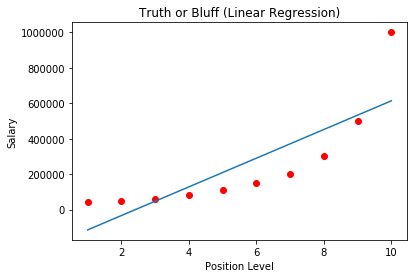

In [34]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X))
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Visualising the Polynomial Regression

We need use lin_reg_2 object to contain the polynomial features. <br>
In the case, lin_reg_2.predict(X_poly)

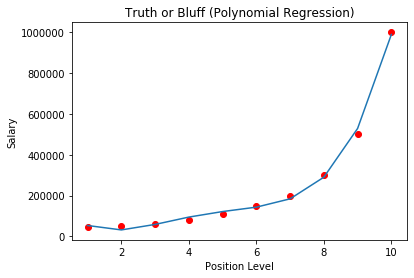

In [35]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)))
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

If we want to increase the resolution of X

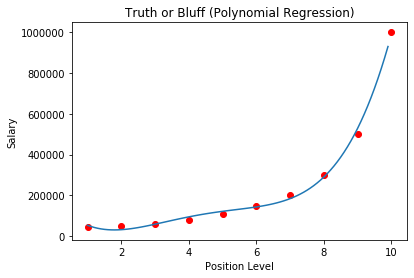

In [36]:
X_grid = np.arange(min(X),max(X),0.1)    # this gives a vector
X_grid = X_grid.reshape((len(X_grid),1))    # use 'reshape' to convert vector to matrix
plt.scatter(X,y,color='red')
plt.plot(X_grid,lin_reg_2.predict(poly_reg.fit_transform(X_grid)))
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Predicting a New Result

Linear Regression:

In [37]:
lin_reg.predict([[6.5]])

array([330378.78787879])

Polynomial Regression:

In [38]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265153])

## SVR (Support Vector Regression)

最简单的线性回归模型是要找出一条曲线使得残差最小。同样的，SVR也是要找出一个超平面，使得所有数据到这个超平面的距离最小。
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%202%20-%20Regression/svr_1.JPG?raw=true' width='400'>
SVR是SVM的一种运用，基本的思路是一致。使用SVR作回归分析，与SVM一样，我们需要找到一个超平面。在SVR，我们定义一个ε，如上图所示，定义虚线内区域的数据点的残差为0，而虚线区域外的数据点（支持向量）到虚线的边界的距离为残差（ζ）。与线性模型类似，我们希望这些残差（ζ）最小。所以大致上来说，**SVR就是要找出一个最佳的条状区域（2ε宽度），再对区域外的点进行回归。**
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%202%20-%20Regression/svr_2.JPG?raw=true' width='400'>
对于非线性的模型，与SVM一样使用核函数（kernel function）映射到特征空间，然后再进行回归。

### Building a SVR
1. Collect a training set $t$ = {$X$,$Y$}
2. Choose a kernel and it's parameters as well as any regularization needed
3. Form the correlation matrix, $K$
4. Train your machine, exactly or approximately, to get contraction coefficients $\alpha$ = {$\alpha_i$}
5. Use those coefficients, create your estimator $f(X,\alpha,x^*) = y^*$

Next step is to choose a kernel
* Gaussian (rbf)

Regularization
* Noise

Correlation Matrix<br>
$K_{ij} = \exp(\sum_{k}\theta_k|x_k^i - x_k^j|^2) + ε\delta_{ij}$

The main part of the algorithm<br>
$K\alpha = y$
<br>where $y$ is the vector of values corresponding to your training set<br>
$K$ is your correlation matrix<br>
$\alpha$ is a set of unknowns we need to solve for $\alpha = K^{-1}y$

Once $\alpha$ parameters known - form the estimator<br>
we use the coefficients we found during the optimization step and the kernel we started off with<br>
To estimate the value $y^*$ for a test point, $x^*$ - compute the correlation vector $k$<br>
$y^* = \alpha k$<br>
$k_i = \exp(\sum_{k}\theta_k|x_k^i - x_k^*|^2)$

In linear regression we are trying to minimize the error between the prediction and data.<br>
In SVR our goal is to make sure that errors do not exceed the threshold

### Implement SVR

We need apply feature scaling for SVR since SVR library does NOT include feature scaling itself

C:\Users\XZV838\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


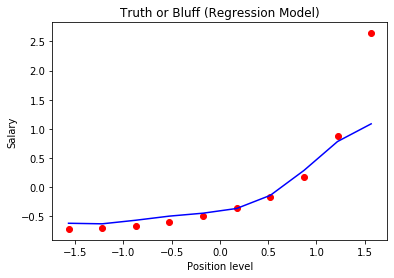

In [39]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values    # it's matrix now rather than array
y = dataset.iloc[:, 2:3].values    # it's matrix now rather than array

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

# Fitting the SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')    # Choose the Gaussian Kernel (rbf)
regressor.fit(X,y)

# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

The "CEO" point has been considered as outliner

单[ ]生成 vector,双[[ ]]才能生成 real array, like matrix

In [40]:
# Predicting a new result
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))

Also need inverse transform to get the original scale of the salary<br>
Otherwise, we will get the scaled prediction of the salary<br>
Since here is the prediction of y, so we use sc_y object for inverse transform

In [41]:
y_pred =sc_y.inverse_transform(y_pred)
y_pred

array([170370.0204065])

## Decision Tree Regression

CART : Classification And Regression Tree
* 如果待预测分类是离散型数据，则CART生成分类决策树(Decision Tree Classification)。
* 如果待预测分类是连续性数据，则CART生成回归决策树(Decision Tree Regression)。

### Fitting the Decision Tree Regression

In [42]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values    # it's matrix now rather than array
y = dataset.iloc[:, 2:3].values    # it's matrix now rather than array

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

### Predicting a New Result

In [43]:
y_pred = regressor.predict([[6.5]])
y_pred

array([150000.])

### Visualising the Decision Tree Regression

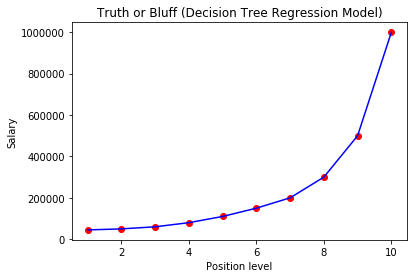

In [44]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

**New Trap :** The information entropy splits the independent variables into several intervals. Since we are in one dimension that means the algorithm only takes intervals at each dot point (ie. 1-2,2-3,3-4...)

The Decision Tree takes the average in each interval

The reason causes this issue due to the plot of the resolution of prediction (for each of 10 levels incremented by 1).
The Decision Tree Regression is non-linear, and non-continuous model. So we need high resolution plot

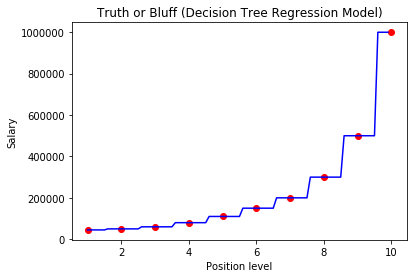

In [45]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

The Decision Tree can be very powerful model in **more dimensions**

## Random Forest Regression

### Ensemble Learning（集成学习）

在机器学习的有监督学习算法中，我们的目标是学习出一个稳定的且在各个方面表现都较好的模型，但实际情况往往不这么理想，有时我们只能得到多个有偏好的模型（弱监督模型，在某些方面表现的比较好）。**集成学习就是组合这里的多个弱监督模型以期得到一个更好更全面的强监督模型。**集成学习潜在的思想是即便某一个弱分类器得到了错误的预测，其他的弱分类器也可以将错误纠正回来。

三个臭皮匠，胜过诸葛亮。。。

**STEP 1:** Pick at random K data points from the Training set<br>
**STEP 2:** Build the Decision Tree associated to these K data points<br>
**STEP 3:** Choose the number of trees you want to build and repeat STEPs 1 & 2 (build a lot of Decision Trees)<br>
**STEP 4:** Make each tree to predict y. And take the average across these predicted y

Random Forest is a team of Decision Trees, each one makes some prediction and averages the different predictions

### Fitting Random Forest Regression Model

In [46]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X,y)

C:\Users\XZV838\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

### Visualising Random Forest Regression results

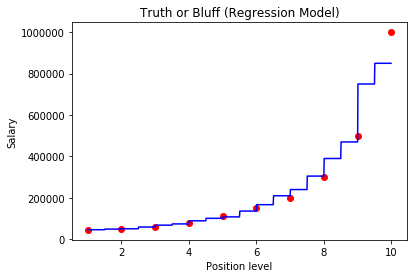

In [47]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

We get more steps in the stairs by having several decision trees instead of one decision tree.
It means we have more splits of the whole range of levels

**每个点都是采用 10 trees (n_estimators)的预测值的平均值**

For example, the prediction for 6.5 level, we have 10 trees (n_estimators) voting on which step the salary of 6.5 level position would be. Then it takes the average of all the different predictions of salary of the 6.5 level

**Notice:** 增加更多的 trees, 可能并不会增加 steps, 因为 the more trees added, the more averge of the different predictions made by the trees is converging to the same average

In [48]:
# Predicting a new result
y_pred = regressor.predict([[6.5]])
y_pred

array([167000.])

### Use 300 trees to Predict

C:\Users\XZV838\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


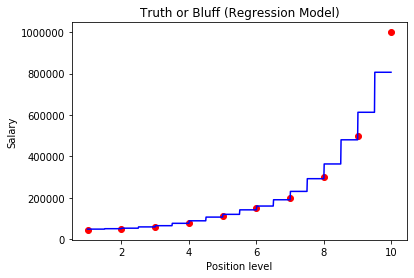

array([160333.33333333])

In [49]:
regressor = RandomForestRegressor(n_estimators=300,random_state=0)
regressor.fit(X,y)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
y_pred = regressor.predict([[6.5]])
y_pred

## Evaluating Regression Models

### R-Squared

Sum of Squares of Residuals: $SS_{res} = \sum(y - y_{hat})^2$<br>
Total Sum of Squares: $SS_{tot} = \sum(y - y_{avg})^2$<br>

<font color = 'red'><b>R-Squared: $R^2 = 1 - \frac{SS{res}}{SS_{tot}}$</b></font><br><br>
Target: $SS_{res}$ -> Min<br>
**The closer R-Squared is to 1, the Better. The lower, the Worse**<br>
R-Squared can be negative ($SS_{res}$ fits the data worse than the data average)

### Adjusted R-Squared

R-Squared 的缺点：<br>
$R^2$ will never decrease if we add more variables to model (ex. from single linear regression to multiple linear regression)
<br>如果新添的variable让model更差，则model自身可让变量的系数变为0，抵消variable带来的影响。因此难以推断新添的变量对model的影响。<br>

需要Adjusted R-Squared 弥补缺点<br><br>
<font color='red'><b>Adjusted R-Squared:  $R_{adj}^2 = 1 - (1 - R^2) \frac{n - 1}{n - p - 1}$</b></font><br>
p - number of independent variables<br>
n - sample size<br>

It penalizes for adding independent variables that don't help the model

### Interpreting Linear Regression Coefficients

Higher Magnitude of coefficient of independent variable does NOT mean more impact on dependent variable.
<br>But Coefficient indicates how per UNIT of independent variable impact dependent variable

## Regression Summary

### The pros and cons of each model

|Regression Model|Pros|Cons|
|:-:|---|---|
|Linear Regression|Works on any size of dataset, gives<br> informations about relevance of features|The Linear Regression Assumptions|
|Polynomial Regression|Works on any size of dataset, works very<br>well on non linear problems|Need to choose the right polynomial degree<br>for a good bias/variance tradeoff|
|SVR|Easily adaptable, works very well on non<br>linear problems, not biased by outliers|Compulsory to apply feature scaling, not<br>well known, more difficult to understand   |
|Decision Tree Regression|Interpretability, no need for feature scaling,<br>works on both linear / nonlinear problems|Poor results on too small datasets,<br>overfitting can easily occur|
|Random Forest Regression|Powerful and accurate, good performance<br>on many problems, including non linear|No interpretability, overfitting can easily<br>occur, need to choose the number of trees|

### Which model to choose for my problem

First, you need to figure out whether your problem is linear or non linear. <br>(More detail in Model Selection Part)

If your problem is linear, you should go for Simple Linear Regression if you only have one feature, Multiple Linear Regression if you have several features.

If your problem is non linear, you should go for Polynomial Regression, SVR, Decision Tree or Random Forest. 
<br>(The more detail in "Model Selection Part".) <br>The method consists of using a very relevant technique that evaluates your models performance, called k-Fold Cross Validation, and then picking the model that shows the best results. 

### Improve each of these models

In Model Selection Part, you will find the second section dedicated to Parameter Tuning, that will allow you to improve the performance of your models, by tuning them. You probably already noticed that each model is composed of two types of parameters:

* the parameters that are learnt, for example the coefficients in Linear Regression,
* the hyperparameters.

The hyperparameters are the parameters that are not learnt and that are fixed values inside the model equations. For example, the regularization parameter lambda or the penalty parameter C are hyperparameters. So far we used the default value of these hyperparameters, and we haven't searched for their optimal value so that your model reaches even higher performance. Finding their optimal value is exactly what Parameter Tuning is about.

[Regularization](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P14-Regularization.pdf)